In [182]:
import cv2
import glob, os
import numpy as np
import pytesseract
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_path = "./sampleCaptchas/input"
os.chdir(data_path)

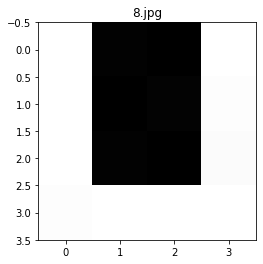

image size: (4, 4, 3)


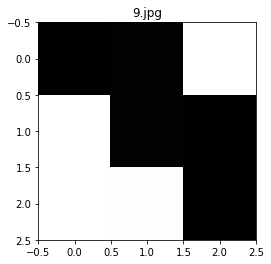

image size: (3, 3, 3)


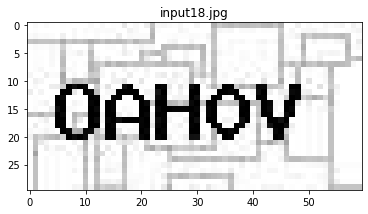

image size: (30, 60, 3)


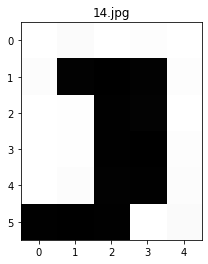

image size: (6, 5, 3)


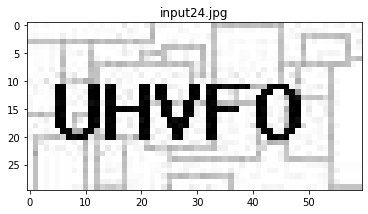

image size: (30, 60, 3)


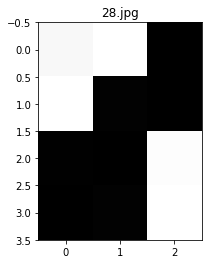

image size: (4, 3, 3)


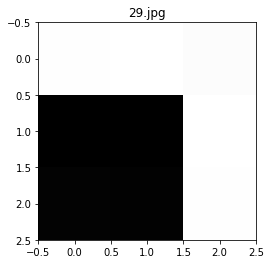

image size: (3, 3, 3)


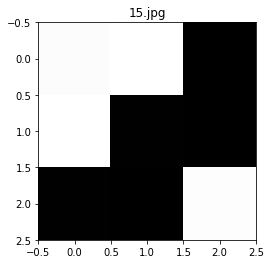

image size: (3, 3, 3)


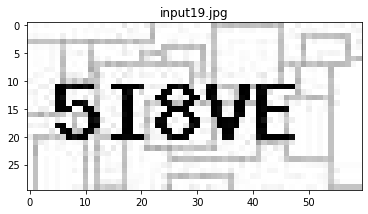

image size: (30, 60, 3)


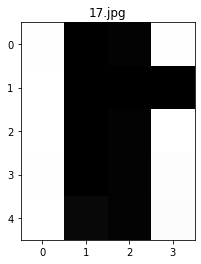

image size: (5, 4, 3)


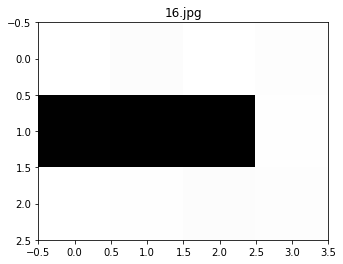

image size: (3, 4, 3)


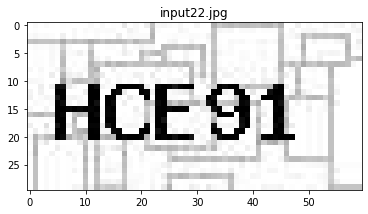

image size: (30, 60, 3)


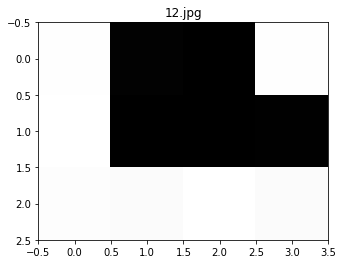

image size: (3, 4, 3)


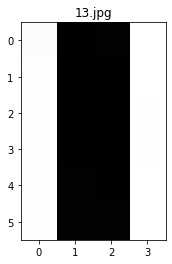

image size: (6, 4, 3)


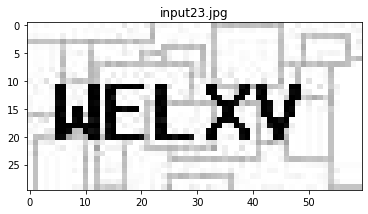

image size: (30, 60, 3)


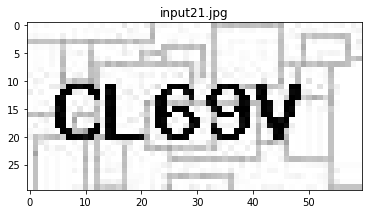

image size: (30, 60, 3)


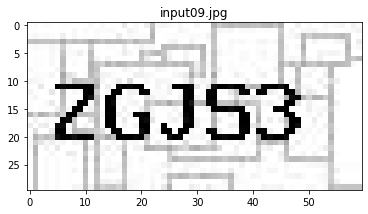

image size: (30, 60, 3)


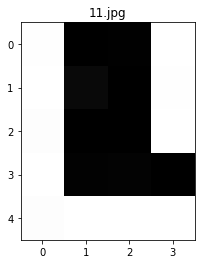

image size: (5, 4, 3)


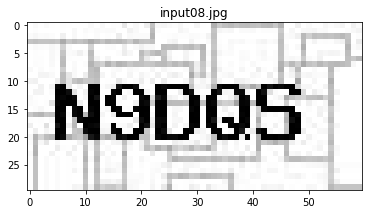

image size: (30, 60, 3)


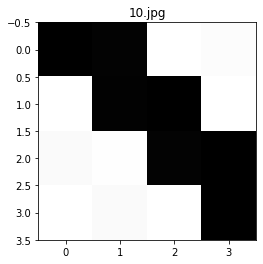

image size: (4, 4, 3)


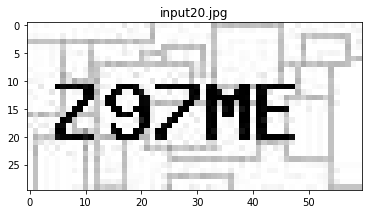

image size: (30, 60, 3)


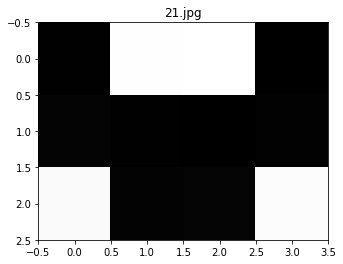

image size: (3, 4, 3)


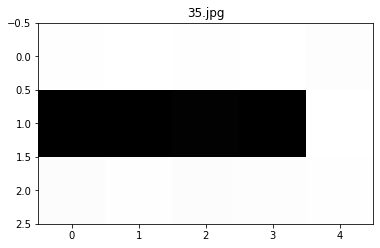

image size: (3, 5, 3)


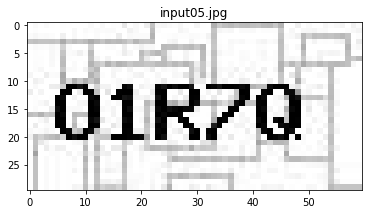

image size: (30, 60, 3)


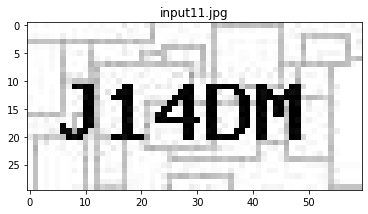

image size: (30, 60, 3)


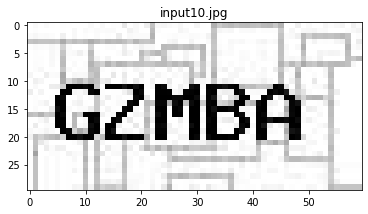

image size: (30, 60, 3)


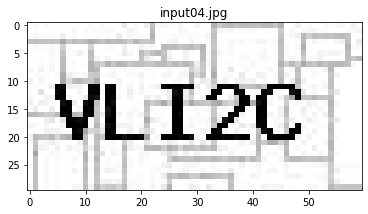

image size: (30, 60, 3)


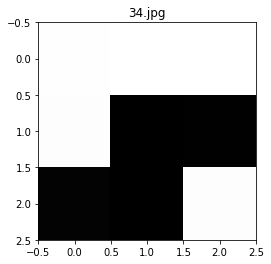

image size: (3, 3, 3)


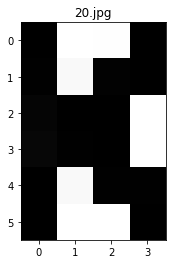

image size: (6, 4, 3)


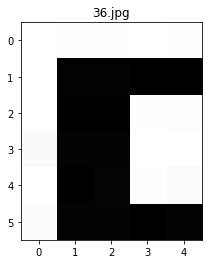

image size: (6, 5, 3)


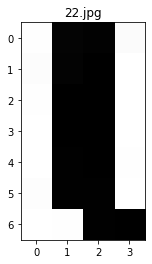

image size: (7, 4, 3)


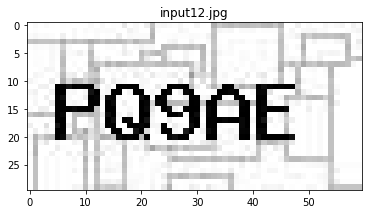

image size: (30, 60, 3)


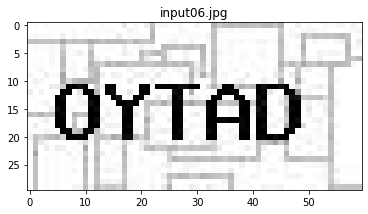

image size: (30, 60, 3)


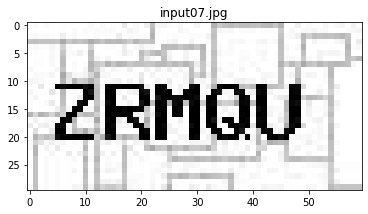

image size: (30, 60, 3)


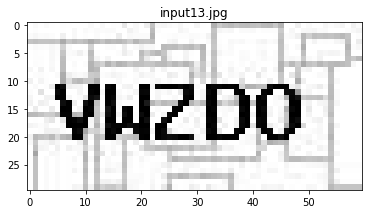

image size: (30, 60, 3)


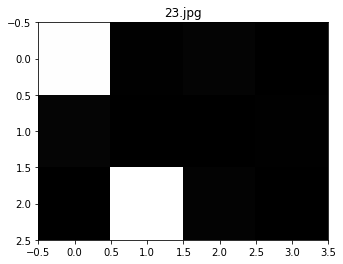

image size: (3, 4, 3)


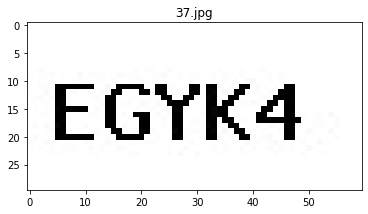

image size: (30, 60, 3)


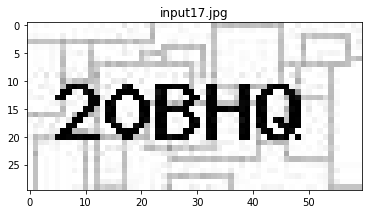

image size: (30, 60, 3)


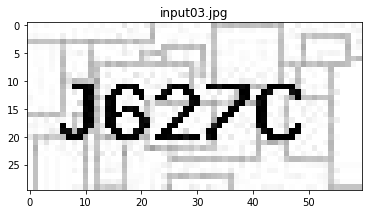

image size: (30, 60, 3)


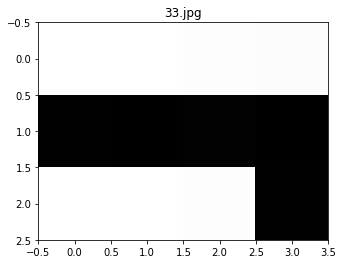

image size: (3, 4, 3)


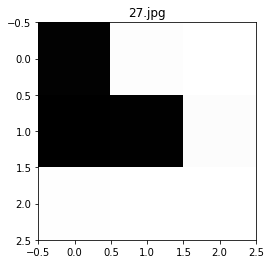

image size: (3, 3, 3)


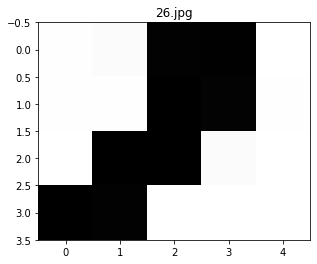

image size: (4, 5, 3)


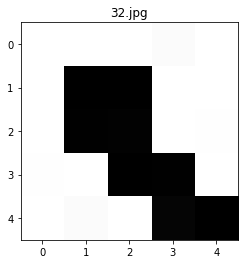

image size: (5, 5, 3)


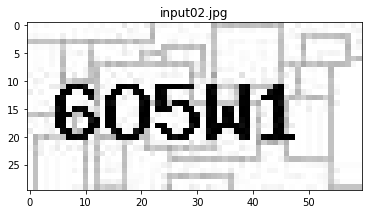

image size: (30, 60, 3)


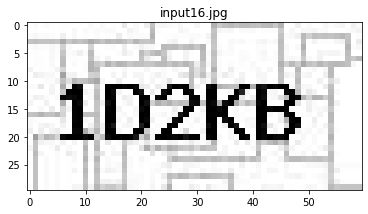

image size: (30, 60, 3)


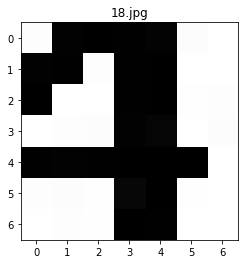

image size: (7, 7, 3)


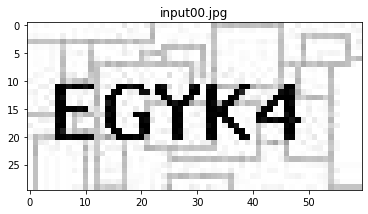

image size: (30, 60, 3)


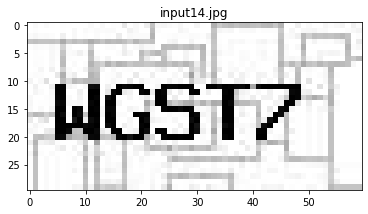

image size: (30, 60, 3)


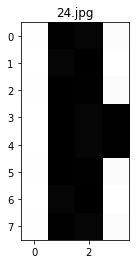

image size: (8, 4, 3)


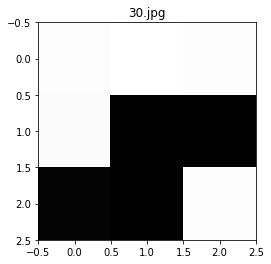

image size: (3, 3, 3)


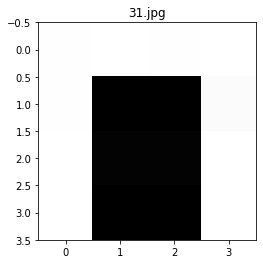

image size: (4, 4, 3)


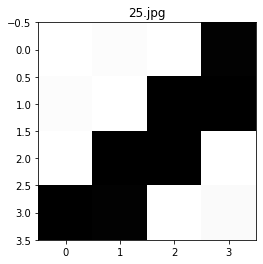

image size: (4, 4, 3)


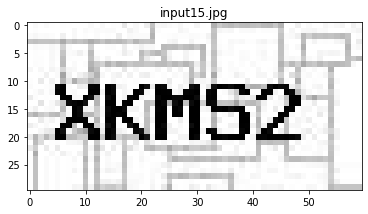

image size: (30, 60, 3)


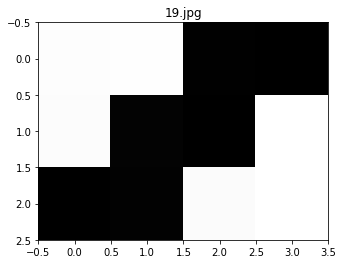

image size: (3, 4, 3)


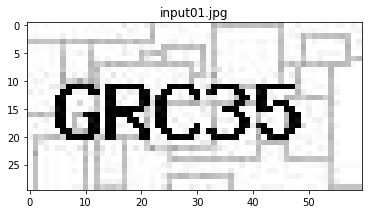

image size: (30, 60, 3)


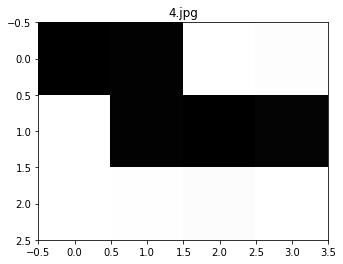

image size: (3, 4, 3)


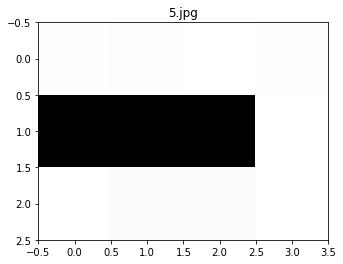

image size: (3, 4, 3)


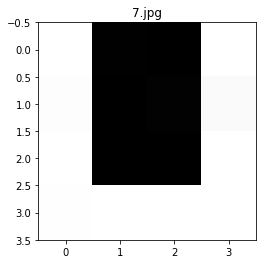

image size: (4, 4, 3)


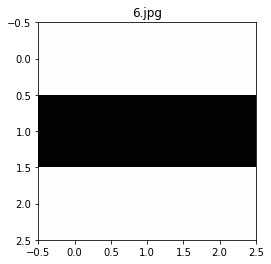

image size: (3, 3, 3)


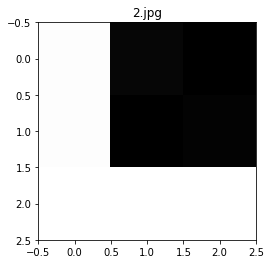

image size: (3, 3, 3)


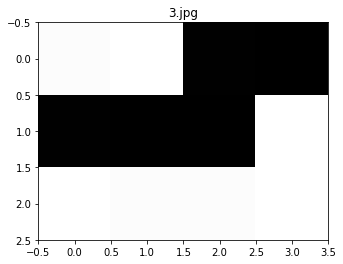

image size: (3, 4, 3)


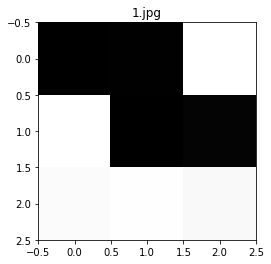

image size: (3, 3, 3)


In [3]:
# plot all training dataset
for file in glob.glob("*.jpg"):
    if file == "input100.jpg":
        continue
    img = mpimg.imread(file)
    imgplot = plt.imshow(img)
    plt.title(file)
    plt.show()
    print(f"image size: {img.shape}")

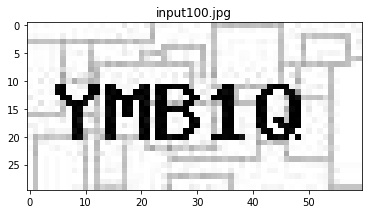

In [4]:
# plot test dataset
filename = "input100.jpg"
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.title(filename)
plt.show()

In [5]:
# from PIL import Image
# img = Image.open(filename).convert("LA")
# imgplot = plt.imshow(img)
# plt.title(filename)
# plt.show()

In [6]:
# from PIL import ImageFilter
# out = img.filter(ImageFilter.EDGE_ENHANCE)
# imgplot = plt.imshow(out)
# plt.title(filename)
# plt.show()

## <font color="Orange"> Using Google OCR

In [8]:
filename = "input19.jpg"

In [9]:
img = cv2.imread(filename)

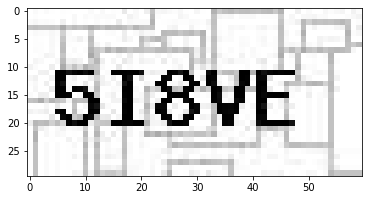

In [10]:
# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgplot = plt.imshow(gray, "gray", vmin=0, vmax=255)
plt.show()

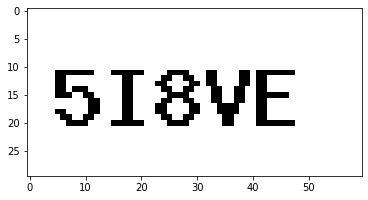

In [11]:
# convert the img to binary grayscale
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
imgplot = plt.imshow(thresh1, "gray", vmin=0, vmax=255)
plt.show()

In [12]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

In [13]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

In [14]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)

In [15]:
im2 = img.copy()

In [16]:
contours

(array([[[ 0,  0]],
 
        [[ 0,  1]],
 
        [[ 0,  2]],
 
        [[ 0,  3]],
 
        [[ 0,  4]],
 
        [[ 0,  5]],
 
        [[ 0,  6]],
 
        [[ 0,  7]],
 
        [[ 0,  8]],
 
        [[ 0,  9]],
 
        [[ 0, 10]],
 
        [[ 0, 11]],
 
        [[ 0, 12]],
 
        [[ 0, 13]],
 
        [[ 0, 14]],
 
        [[ 0, 15]],
 
        [[ 0, 16]],
 
        [[ 0, 17]],
 
        [[ 0, 18]],
 
        [[ 0, 19]],
 
        [[ 0, 20]],
 
        [[ 0, 21]],
 
        [[ 0, 22]],
 
        [[ 0, 23]],
 
        [[ 0, 24]],
 
        [[ 0, 25]],
 
        [[ 0, 26]],
 
        [[ 0, 27]],
 
        [[ 0, 28]],
 
        [[ 0, 29]],
 
        [[ 1, 29]],
 
        [[ 2, 29]],
 
        [[ 3, 29]],
 
        [[ 4, 29]],
 
        [[ 5, 29]],
 
        [[ 6, 29]],
 
        [[ 7, 29]],
 
        [[ 8, 29]],
 
        [[ 9, 29]],
 
        [[10, 29]],
 
        [[11, 29]],
 
        [[12, 29]],
 
        [[13, 29]],
 
        [[14, 29]],
 
        [[15, 29]],
 
        [[

In [17]:
x, y, w, h = cv2.boundingRect(contours[0])

# Drawing a rectangle on copied image
rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Cropping the text block for giving input to OCR
cropped = im2[y:y + h, x:x + w]

pytesseract.pytesseract.tesseract_cmd = r'/usr/local/Cellar/tesseract/5.0.1/bin/tesseract'

# Apply OCR on the cropped image
text = pytesseract.image_to_string(cropped, lang="eng", config="--psm 6")

out_name = "output" + filename.split(".")[0][5:] + ".text"

with open(out_name, "w+") as f:
    f.write(text)

In [18]:
text

'SI8VE\n'

## <font color="Orange"> Train my own OCR for this task

In [137]:
# # clean all input images
# data_path = Path(".")

# for filename in list(data_path.glob("*.jpg")):
#     img = cv2.imread(str(filename))
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     ret, cleaned = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
#     out = "../cleaned_input/" + str(filename)
#     cv2.imwrite(out, cleaned)

In [138]:
# Get list of all the input images
data_path = Path("../cleaned_input")
temp = list(map(str, list(data_path.glob("*.jpg"))))
images = sorted([i for i in temp if i not in [str(data_path) + "/input21.jpg", str(data_path) + "/input100.jpg"]])
images = [img.split(os.path.sep)[-1].split(".jpg")[0] for img in images]
images

['input00',
 'input01',
 'input02',
 'input03',
 'input04',
 'input05',
 'input06',
 'input07',
 'input08',
 'input09',
 'input10',
 'input11',
 'input12',
 'input13',
 'input14',
 'input15',
 'input16',
 'input17',
 'input18',
 'input19',
 'input20',
 'input22',
 'input23',
 'input24']

In [139]:
# get the corresponding labels for the input images
label_path = Path("../output")
temp = sorted(list(map(str, list(label_path.glob("*.txt")))))
temp

['../output/output00.txt',
 '../output/output01.txt',
 '../output/output02.txt',
 '../output/output03.txt',
 '../output/output04.txt',
 '../output/output05.txt',
 '../output/output06.txt',
 '../output/output07.txt',
 '../output/output08.txt',
 '../output/output09.txt',
 '../output/output10.txt',
 '../output/output11.txt',
 '../output/output12.txt',
 '../output/output13.txt',
 '../output/output14.txt',
 '../output/output15.txt',
 '../output/output16.txt',
 '../output/output17.txt',
 '../output/output18.txt',
 '../output/output19.txt',
 '../output/output20.txt',
 '../output/output22.txt',
 '../output/output23.txt',
 '../output/output24.txt']

In [140]:
labels = list()
for path in temp:
    with open(path, "r") as f:
        content = f.read()
        labels.append(content[:5])
print(labels)

['EGYK4', 'GRC35', '6O5W1', 'J627C', 'VLI2C', 'O1R7Q', 'OYTAD', 'ZRMQU', 'N9DQS', 'ZGJS3', 'GZMBA', 'J14DM', 'PQ9AE', 'VWZDO', 'WGST7', 'XKMS2', '1D2KB', '20BHQ', 'OAH0V', '5I8VE', 'Z97ME', 'HCE91', 'WELXV', 'UHVFO']


In [141]:
# all the unique characters
characters = set(char for label in labels for char in label)

In [142]:
print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)

Number of images found:  24
Number of labels found:  24
Number of unique characters:  36
Characters present:  {'A', 'O', 'M', 'G', 'F', 'W', 'B', '0', 'V', 'H', 'E', 'X', '8', 'J', '1', 'I', '2', 'T', '3', '7', 'Y', 'U', 'D', '5', 'N', 'K', 'P', '4', 'C', '9', 'L', 'R', '6', 'Q', 'S', 'Z'}


In [144]:
# Batch size for training and validation
batch_size = 16

# Desired image dimensions
img_width = 30
img_height = 60

# Factor by which the image is going to be downsampled
# by the convolutional blocks. We will be using two
# convolution blocks and each block will have
# a pooling layer which downsample the features by a factor of 2.
# Hence total downsampling factor would be 4.
downsample_factor = 4

# Maximum length of any captcha in the dataset
max_length = max([len(label) for label in labels])

In [145]:
list(zip(images, labels))

[('input00', 'EGYK4'),
 ('input01', 'GRC35'),
 ('input02', '6O5W1'),
 ('input03', 'J627C'),
 ('input04', 'VLI2C'),
 ('input05', 'O1R7Q'),
 ('input06', 'OYTAD'),
 ('input07', 'ZRMQU'),
 ('input08', 'N9DQS'),
 ('input09', 'ZGJS3'),
 ('input10', 'GZMBA'),
 ('input11', 'J14DM'),
 ('input12', 'PQ9AE'),
 ('input13', 'VWZDO'),
 ('input14', 'WGST7'),
 ('input15', 'XKMS2'),
 ('input16', '1D2KB'),
 ('input17', '20BHQ'),
 ('input18', 'OAH0V'),
 ('input19', '5I8VE'),
 ('input20', 'Z97ME'),
 ('input22', 'HCE91'),
 ('input23', 'WELXV'),
 ('input24', 'UHVFO')]

#### Preprocessing

In [146]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [147]:
# Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

In [148]:
def split_data(images, labels, train_size=0.8, shuffle=False):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    # 3. Get the size of training samples
    train_samples = int(size * train_size)
    # 4. Split data into training and validation sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_valid, y_valid = images[indices[train_samples:]], labels[indices[train_samples:]]
    return x_train, x_valid, y_train, y_valid

In [149]:
# Splitting data into training and validation sets
x_train, x_valid, y_train, y_valid = split_data(np.array(images), np.array(labels))

In [150]:
x_train

array(['input00', 'input01', 'input02', 'input03', 'input04', 'input05',
       'input06', 'input07', 'input08', 'input09', 'input10', 'input11',
       'input12', 'input13', 'input14', 'input15', 'input16', 'input17',
       'input18'], dtype='<U7')

In [151]:
y_train

array(['EGYK4', 'GRC35', '6O5W1', 'J627C', 'VLI2C', 'O1R7Q', 'OYTAD',
       'ZRMQU', 'N9DQS', 'ZGJS3', 'GZMBA', 'J14DM', 'PQ9AE', 'VWZDO',
       'WGST7', 'XKMS2', '1D2KB', '20BHQ', 'OAH0V'], dtype='<U5')

In [152]:
def encode_single_sample(img, label):
    img_path = img + ".jpg"
    # 1. Read image
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_jpeg(img, channels=1)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])
    # 6. Map the characters in label to numbers
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    # 7. Return a dict as our model is expecting two inputs
    return {"image": img, "label": label}

#### Create Dataset objects

In [153]:
data_path = "../cleaned_input"
os.chdir(data_path)

In [154]:
ls

captcha_images_v2.zip  input08.jpg            input16.jpg
input00.jpg            input09.jpg            input17.jpg
input01.jpg            input10.jpg            input18.jpg
input02.jpg            input100.jpg           input19.jpg
input03.jpg            input11.jpg            input20.jpg
input04.jpg            input12.jpg            input21.jpg
input05.jpg            input13.jpg            input22.jpg
input06.jpg            input14.jpg            input23.jpg
input07.jpg            input15.jpg            input24.jpg


In [155]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

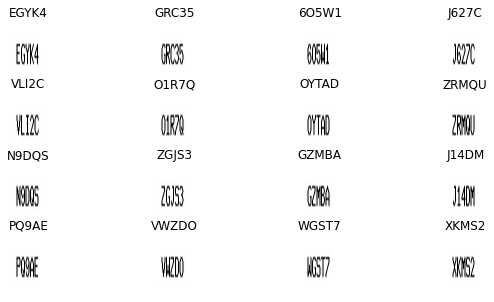

In [156]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

#### Modelling

In [157]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred


def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
#     x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
#     x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width), (img_height) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
#     x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 30, 60, 1)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 30, 60, 32)   320         ['image[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 30, 60, 64)   18496       ['Conv1[0][0]']                  
                                                                                                  
 reshape (Reshape)              (None, 30, 3840)     0           ['Conv2[0][0]']                  
                                                                                       

In [158]:
epochs = 100
early_stopping_patience = 10
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping],
)

Epoch 1/100
2/2 [==============================] - 7s 2s/step - loss: 87.7126 - val_loss: 42.1863
Epoch 2/100
2/2 [==============================] - 0s 114ms/step - loss: 44.2613 - val_loss: 22.6599
Epoch 3/100
2/2 [==============================] - 0s 114ms/step - loss: 24.3205 - val_loss: 19.9285
Epoch 4/100
2/2 [==============================] - 0s 107ms/step - loss: 20.1883 - val_loss: 21.3565
Epoch 5/100
2/2 [==============================] - 0s 109ms/step - loss: 20.9053 - val_loss: 22.3033
Epoch 6/100
2/2 [==============================] - 0s 108ms/step - loss: 21.4840 - val_loss: 22.1091
Epoch 7/100
2/2 [==============================] - 0s 107ms/step - loss: 21.1188 - val_loss: 21.3235
Epoch 8/100
2/2 [==============================] - 0s 108ms/step - loss: 20.1410 - val_loss: 20.3019
Epoch 9/100
2/2 [==============================] - 0s 116ms/step - loss: 19.4474 - val_loss: 20.2129
Epoch 10/100
2/2 [==============================] - 0s 118ms/step - loss: 19.5026 - val_loss: 

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 30, 60, 1)]       0         
                                                                 
 Conv1 (Conv2D)              (None, 30, 60, 32)        320       
                                                                 
 Conv2 (Conv2D)              (None, 30, 60, 64)        18496     
                                                                 
 reshape (Reshape)           (None, 30, 3840)          0         
                                                                 
 dense1 (Dense)              (None, 30, 64)            245824    
                                                                 
 bidirectional_4 (Bidirectio  (None, 30, 256)          197632    
 nal)                                                            
                                                           

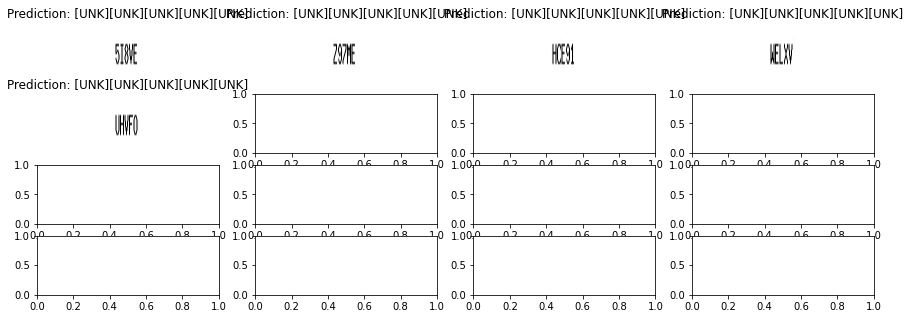

In [160]:
# Get the prediction model by extracting layers till the output layer
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
prediction_model.summary()

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some validation samples
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()

## <font color="Orange"> Try image manipulation

In [93]:
# Get list of all the input images
data_path = Path("../cleaned_input")
temp = list(map(str, list(data_path.glob("*.jpg"))))
images = sorted([i for i in temp if i not in [str(data_path) + "/input21.jpg", str(data_path) + "/input100.jpg"]])
images

['../cleaned_input/input00.jpg',
 '../cleaned_input/input01.jpg',
 '../cleaned_input/input02.jpg',
 '../cleaned_input/input03.jpg',
 '../cleaned_input/input04.jpg',
 '../cleaned_input/input05.jpg',
 '../cleaned_input/input06.jpg',
 '../cleaned_input/input07.jpg',
 '../cleaned_input/input08.jpg',
 '../cleaned_input/input09.jpg',
 '../cleaned_input/input10.jpg',
 '../cleaned_input/input11.jpg',
 '../cleaned_input/input12.jpg',
 '../cleaned_input/input13.jpg',
 '../cleaned_input/input14.jpg',
 '../cleaned_input/input15.jpg',
 '../cleaned_input/input16.jpg',
 '../cleaned_input/input17.jpg',
 '../cleaned_input/input18.jpg',
 '../cleaned_input/input19.jpg',
 '../cleaned_input/input20.jpg',
 '../cleaned_input/input22.jpg',
 '../cleaned_input/input23.jpg',
 '../cleaned_input/input24.jpg']

In [94]:
ls

1.jpg          26.jpg         9.jpg          input08.txt    input17.jpg
10.jpg         27.jpg         input00.jpg    input09.jpg    input17.txt
11.jpg         28.jpg         input00.txt    input09.txt    input18.jpg
12.jpg         29.jpg         input01.jpg    input10.jpg    input18.txt
13.jpg         3.jpg          input01.txt    input10.txt    input19.jpg
14.jpg         30.jpg         input02.jpg    input100.jpg   input19.txt
15.jpg         31.jpg         input02.txt    input11.jpg    input20.jpg
16.jpg         32.jpg         input03.jpg    input11.txt    input20.txt
17.jpg         33.jpg         input03.txt    input12.jpg    input21.jpg
18.jpg         34.jpg         input04.jpg    input12.txt    input21.txt
19.jpg         35.jpg         input04.txt    input13.jpg    input22.jpg
2.jpg          36.jpg         input05.jpg    input13.txt    input22.txt
20.jpg         37.jpg         input05.txt    input14.jpg    input23.jpg
21.jpg         4.jpg          input06.jpg    input14.txt    inpu

In [115]:
label_path = Path("../output")
temp = sorted(list(map(str, list(label_path.glob("*.txt")))))
labels = list()
for path in temp:
    with open(path, "r") as f:
        content = f.read()
        labels.append(content[:5])
print(labels)

['EGYK4', 'GRC35', '6O5W1', 'J627C', 'VLI2C', 'O1R7Q', 'OYTAD', 'ZRMQU', 'N9DQS', 'ZGJS3', 'GZMBA', 'J14DM', 'PQ9AE', 'VWZDO', 'WGST7', 'XKMS2', '1D2KB', '20BHQ', 'OAH0V', '5I8VE', 'Z97ME', 'HCE91', 'WELXV', 'UHVFO']


In [116]:
mapper = dict(zip(images, labels))

In [123]:
characters = set(char for label in labels for char in label)
database = {k: None for k in characters}
database

{'4': None,
 'T': None,
 '5': None,
 '6': None,
 'V': None,
 'N': None,
 '0': None,
 'E': None,
 'M': None,
 '7': None,
 '3': None,
 'U': None,
 'Z': None,
 'Q': None,
 'O': None,
 'P': None,
 'J': None,
 'C': None,
 '9': None,
 '8': None,
 'F': None,
 'R': None,
 'Y': None,
 'I': None,
 'L': None,
 'G': None,
 'X': None,
 'D': None,
 'H': None,
 'B': None,
 'W': None,
 'S': None,
 'K': None,
 '1': None,
 '2': None,
 'A': None}

'label: EGYK4'

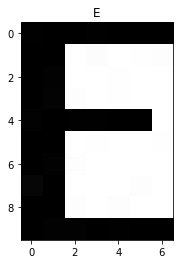

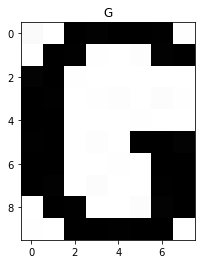

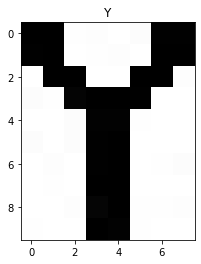

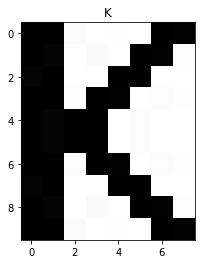

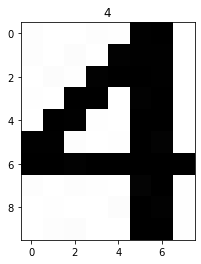

'label: GRC35'

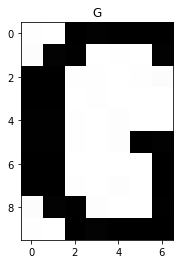

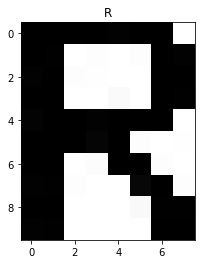

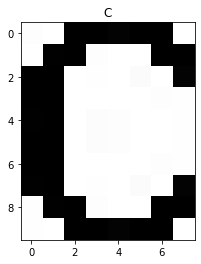

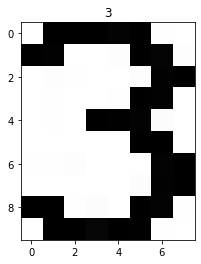

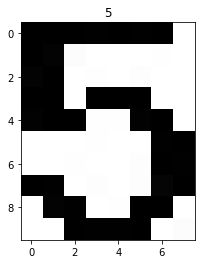

'label: 6O5W1'

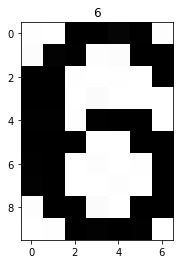

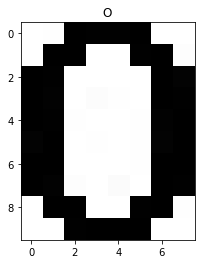

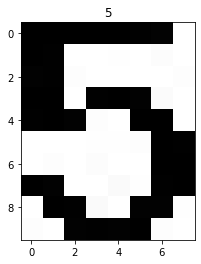

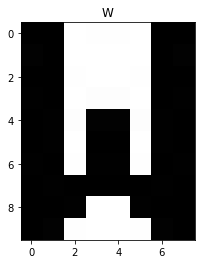

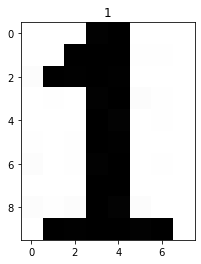

'label: J627C'

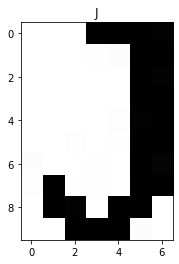

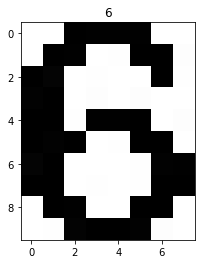

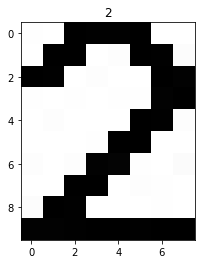

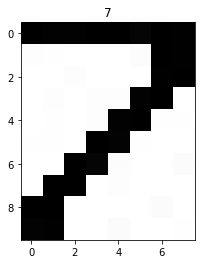

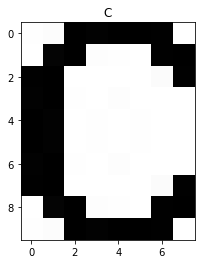

'label: VLI2C'

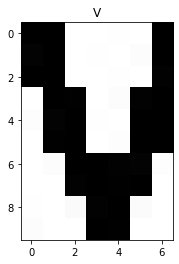

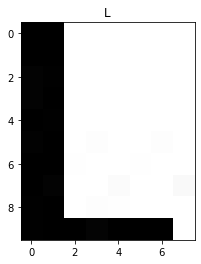

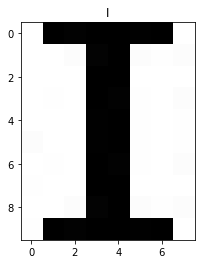

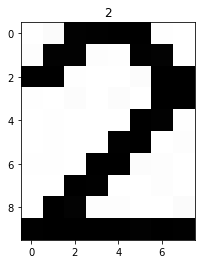

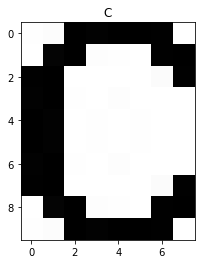

'label: O1R7Q'

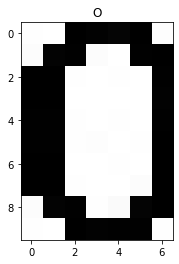

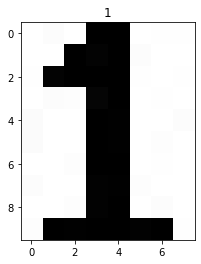

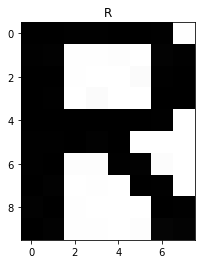

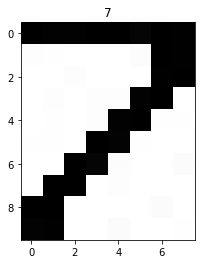

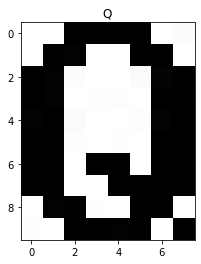

'label: OYTAD'

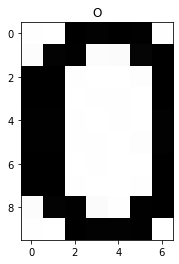

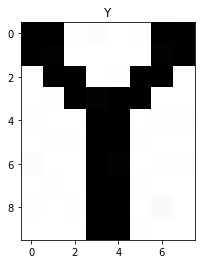

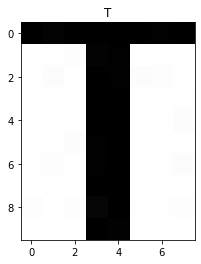

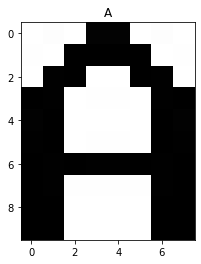

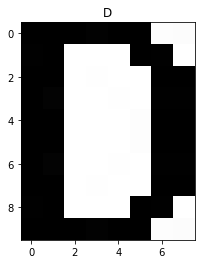

'label: ZRMQU'

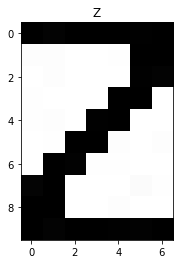

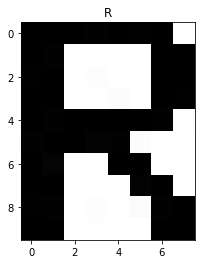

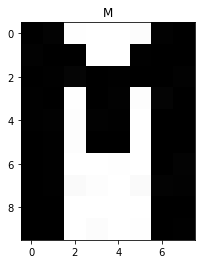

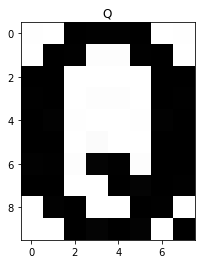

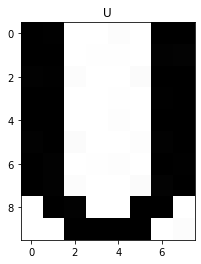

'label: N9DQS'

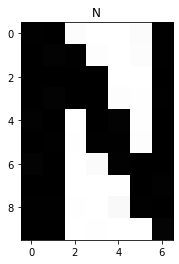

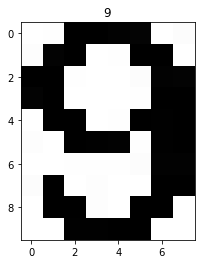

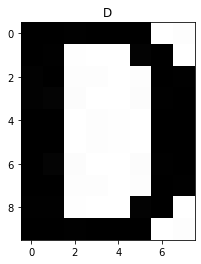

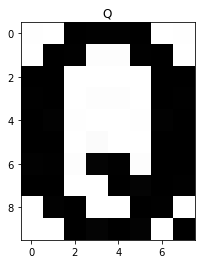

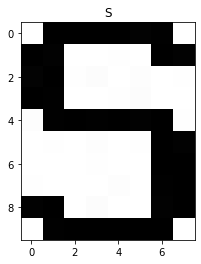

'label: ZGJS3'

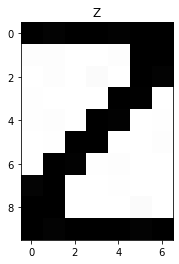

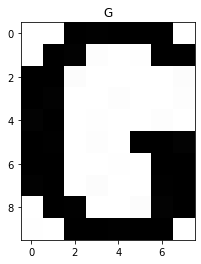

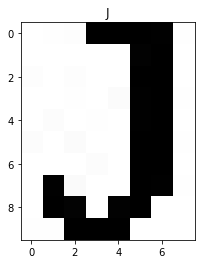

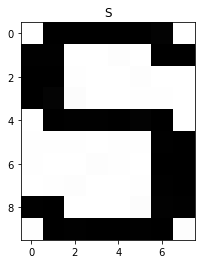

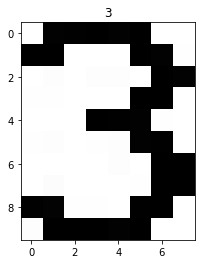

'label: GZMBA'

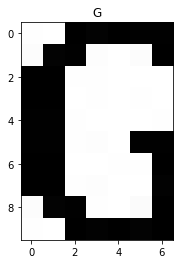

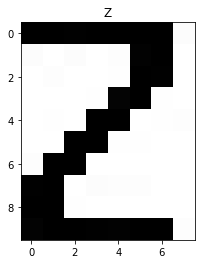

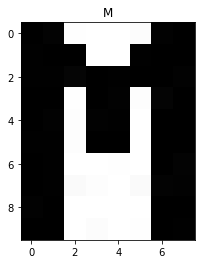

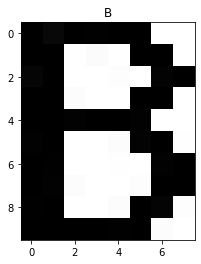

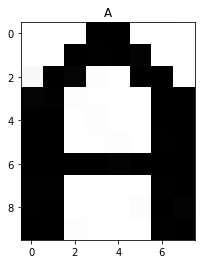

'label: J14DM'

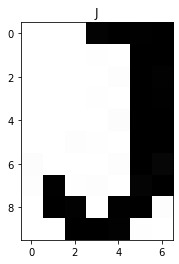

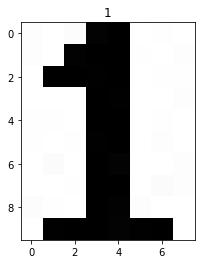

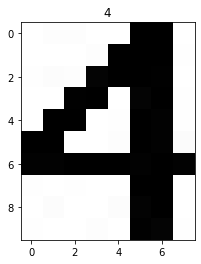

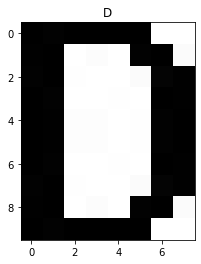

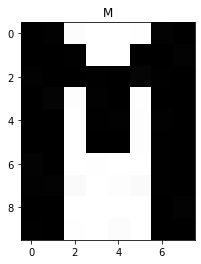

'label: PQ9AE'

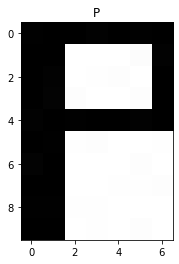

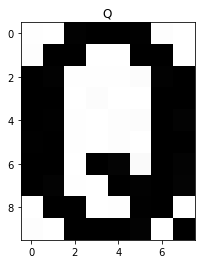

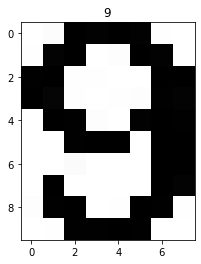

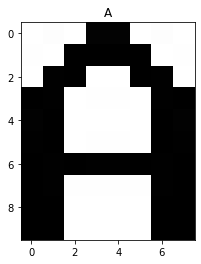

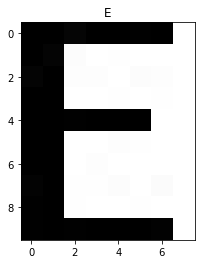

'label: VWZDO'

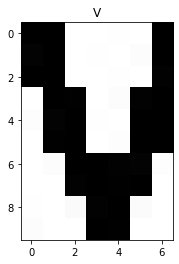

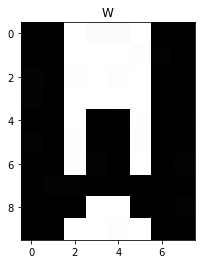

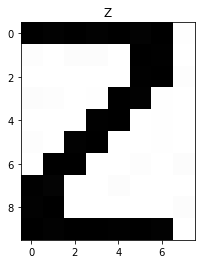

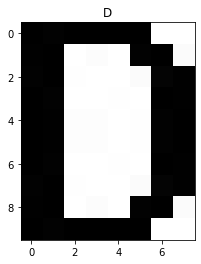

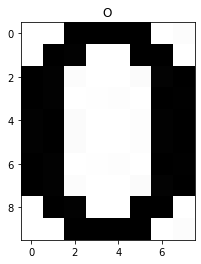

'label: WGST7'

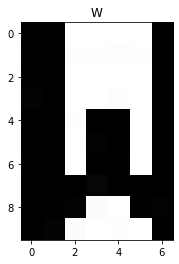

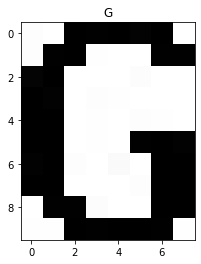

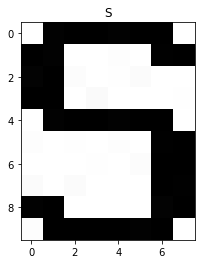

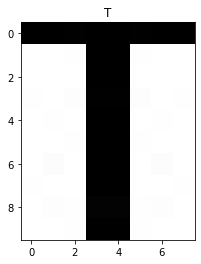

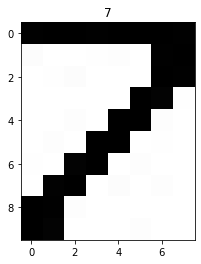

'label: XKMS2'

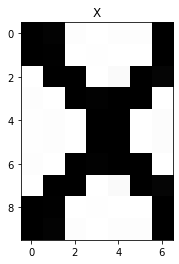

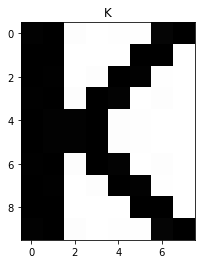

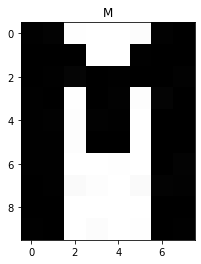

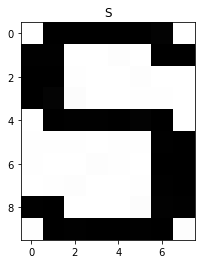

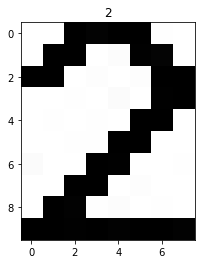

'label: 1D2KB'

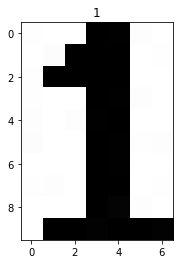

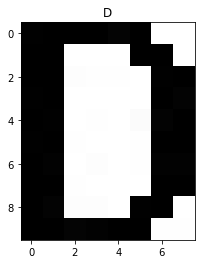

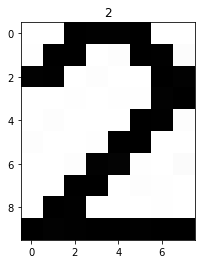

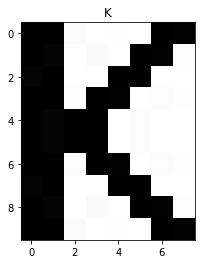

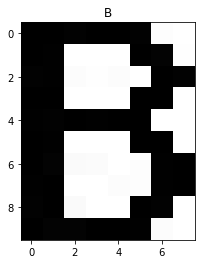

'label: 20BHQ'

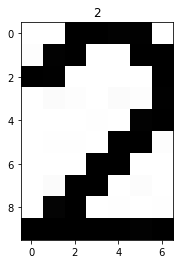

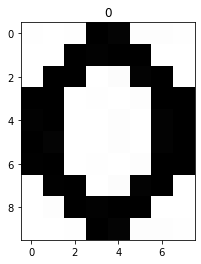

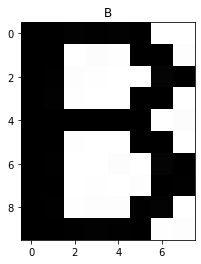

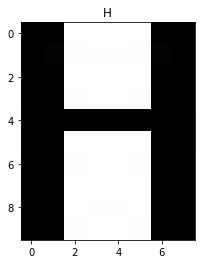

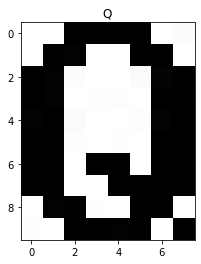

'label: OAH0V'

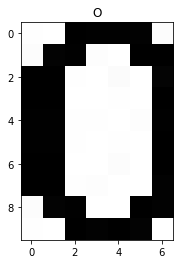

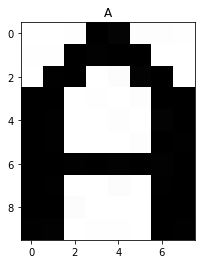

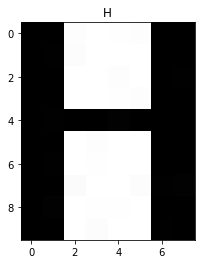

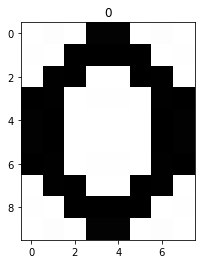

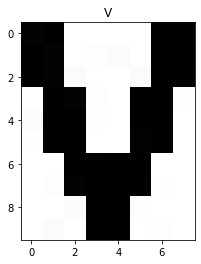

'label: 5I8VE'

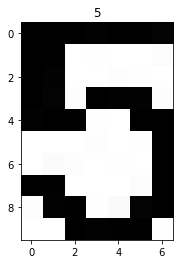

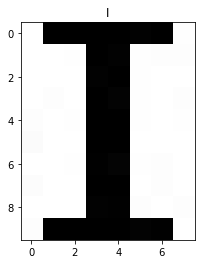

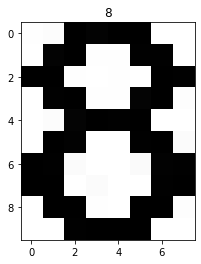

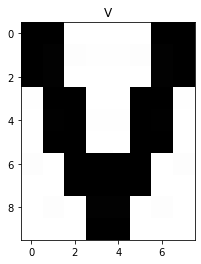

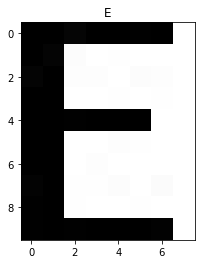

'label: Z97ME'

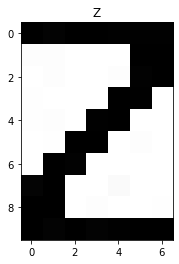

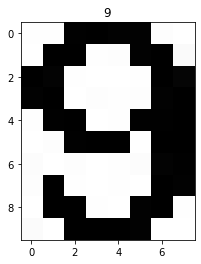

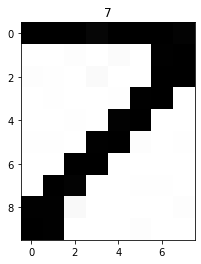

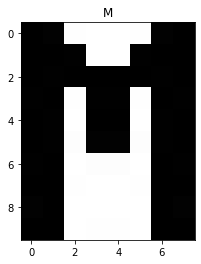

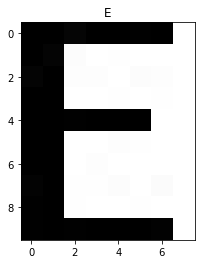

'label: HCE91'

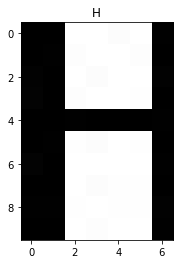

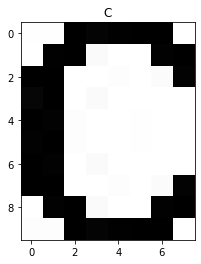

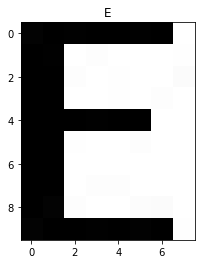

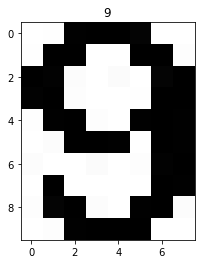

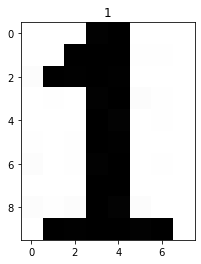

'label: WELXV'

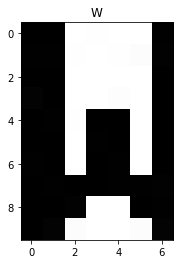

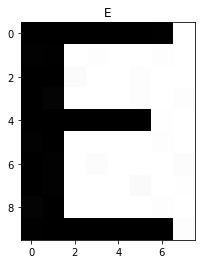

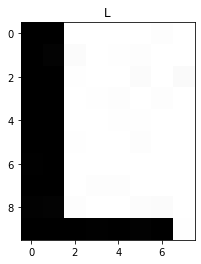

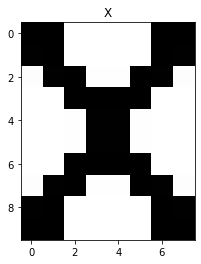

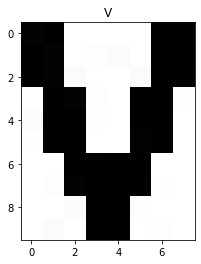

'label: UHVFO'

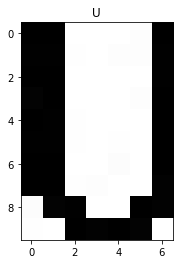

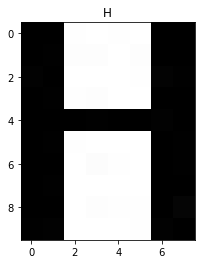

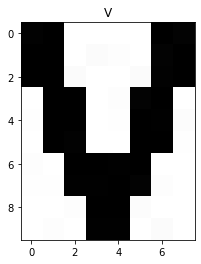

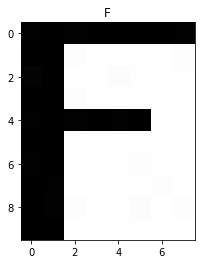

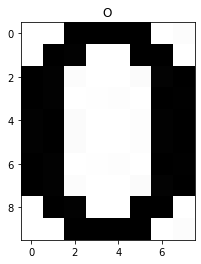

In [128]:
for filename in images:
    im = cv2.imread(filename)
    label = mapper[filename]
    display(f"label: {label}")
#     cv2.rectangle(im, (5, 11), (12, 21), (255, 0, 255), 1)
#     cv2.rectangle(im, (14, 11), (22, 21), (255, 0, 255), 1)
#     cv2.rectangle(im, (23, 11), (31, 21), (255, 0, 255), 1)
#     cv2.rectangle(im, (32, 11), (40, 21), (255, 0, 255), 1)
#     cv2.rectangle(im, (41, 11), (49, 21), (255, 0, 255), 1)
    crop_img_1 = im[11:21, 5:12]
    plt.figure()
    plt.title(label[0])
    plt.imshow(crop_img_1)
    if database[label[0]] is None:
        database[label[0]] = crop_img_1
    
    crop_img_2 = im[11:21, 14:22]
    plt.figure()
    plt.title(label[1])
    plt.imshow(crop_img_2)
    if database[label[1]] is None:
        database[label[1]] = crop_img_2
    
    crop_img_3 = im[11:21, 23:31]
    plt.figure()
    plt.title(label[2])
    plt.imshow(crop_img_3)
    if database[label[2]] is None:
        database[label[2]] = crop_img_3

    crop_img_4 = im[11:21, 32:40]
    plt.figure()
    plt.title(label[3])
    plt.imshow(crop_img_4)
    if database[label[3]] is None:
        database[label[3]] = crop_img_4
    
    crop_img_5 = im[11:21, 41:49]
    plt.figure()
    plt.title(label[4])
    plt.imshow(crop_img_5)
    if database[label[4]] is None:
        database[label[4]] = crop_img_5
    
    plt.show()

In [129]:
database

{'4': array([[[253, 253, 253],
         [255, 255, 255],
         [255, 255, 255],
         [253, 253, 253],
         [254, 254, 254],
         [  1,   1,   1],
         [  0,   0,   0],
         [255, 255, 255]],
 
        [[253, 253, 253],
         [255, 255, 255],
         [252, 252, 252],
         [255, 255, 255],
         [  2,   2,   2],
         [  1,   1,   1],
         [  1,   1,   1],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [252, 252, 252],
         [254, 254, 254],
         [  2,   2,   2],
         [  0,   0,   0],
         [  0,   0,   0],
         [  1,   1,   1],
         [255, 255, 255]],
 
        [[254, 254, 254],
         [255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255],
         [  2,   2,   2],
         [  0,   0,   0],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [  0,   0,   0],
         [  1,   1,   1],
         [254, 254, 254],
         [255, 255, 255],
         [  0,   0,  

In [139]:
import imagehash
from PIL import Image

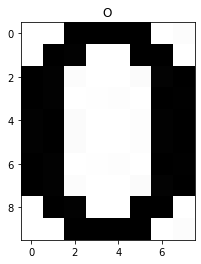

In [154]:
plt.figure()
plt.title(label[4])
plt.imshow(crop_img_5)

In [177]:
type(hash)

imagehash.ImageHash

In [159]:
hash - database[""]

0

In [149]:
database = {k: imagehash.average_hash(Image.fromarray(v)) for k, v in database.items()}

In [151]:
database

{'4': array([[ True,  True,  True,  True,  True, False, False,  True],
        [ True,  True,  True,  True, False, False, False,  True],
        [ True,  True, False, False,  True, False, False,  True],
        [ True, False, False,  True,  True, False, False,  True],
        [False, False,  True,  True,  True, False, False,  True],
        [False, False, False, False, False, False, False, False],
        [ True,  True,  True,  True,  True, False, False,  True],
        [ True,  True,  True,  True,  True, False, False,  True]]),
 'T': array([[False, False, False, False, False, False, False, False],
        [ True,  True,  True, False, False,  True,  True,  True],
        [ True,  True,  True, False, False,  True,  True,  True],
        [ True,  True,  True, False, False,  True,  True,  True],
        [ True,  True,  True, False, False,  True,  True,  True],
        [ True,  True,  True, False, False,  True,  True,  True],
        [ True,  True,  True, False, False,  True,  True,  True]

In [176]:
os.path.join("../cleaned_input", "input100.jpg")

'../cleaned_input/input100.jpg'

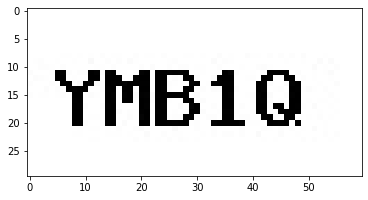

In [160]:
test_name = '../cleaned_input/input100.jpg'
im = cv2.imread(test_name)
plt.figure()
plt.imshow(im)

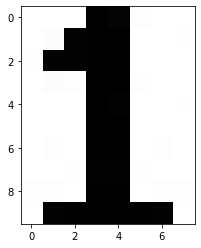

In [170]:
crop_img_1 = im[11:21, 32:40]
plt.figure()
plt.imshow(crop_img_1)

In [171]:
hash = imagehash.average_hash(Image.fromarray(crop_img_1))
print(hash)

e78787e7e7e7e781


In [172]:
minimum = 100
label = None
for k, v in database.items():
    if v - hash < minimum:
        label = k
        minimum = v - hash

In [173]:
label

'1'

In [175]:
minimum

0

#### test datapipeline

In [185]:
from src.pre_processing_pipeline import start_preprocessing_image

In [ ]:
path = 

reference:


    tesserect: 
    https://stackoverflow.com/a/51583635  
    https://www.geeksforgeeks.org/text-detection-and-extraction-using-opencv-and-ocr/ 
    
    RGB image:
    https://stackoverflow.com/a/52307690
    
    Keras OCR: 
    https://keras.io/examples/vision/captcha_ocr/
    
    image hash:
    https://github.com/JohannesBuchner/imagehash

In [130]:
pip install imagehash


  Using cached ImageHash-4.2.1.tar.gz (812 kB)
     |████████████████████████████████| 33.2 MB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 33.7 MB/s eta 0:00:01
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295197 sha256=d0bd21fd3a7d1d7f7d7ad8652f3404399fa85442794dbf27b6c84664be1525b3
  Stored in directory: /Users/6estates/Library/Caches/pip/wheels/51/f9/a5/740af2fdb0ad1edf79aabdc41531be0b6f0b2e2be684c388cf
Successfully built imagehash
Note: you may need to restart the kernel to use updated packages.
